In [16]:
import os
import pathlib

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("C:/Users/yashoda PC/Downloads/DS&JAVA/SUPRAJITH\DS\mpg_raw (1).csv")

In [19]:
# Identify the dimension of dataset
df.shape

(398, 9)

In [20]:
# Identify the summary of dataset
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [21]:
# Identify the structure of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [22]:
# To find the null values
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [23]:
# To drop null values
df.dropna()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


array([[<Axes: title={'center': 'displacement'}>]], dtype=object)

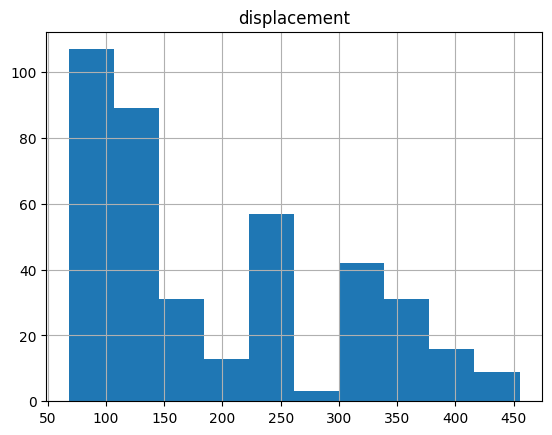

In [24]:
# To plot the histogram
df.hist(["displacement"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c5f641cb90>,
 'caps': [<matplotlib.lines.Line2D at 0x1c5f641ded0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c5f63cb490>],
 'medians': [<matplotlib.lines.Line2D at 0x1c5f641f0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c5f641f9d0>],
 'means': []}

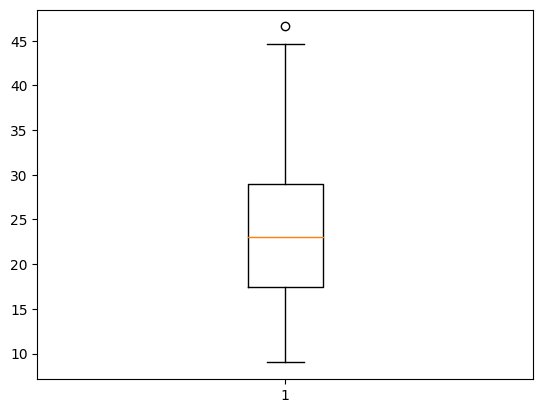

In [25]:
# Recognize the outliners using box plot
plt.boxplot(df['mpg'])

In [26]:
# Create box plot for outliner treatment
Q1 = df['mpg'].quantile(0.25)
Q3 = df['mpg'].quantile(0.75)
IQR = Q3-Q1
print(Q1)
print(Q3)
print(IQR)
lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)
print(lower, upper)

17.5
29.0
11.5
0.25 46.25


{'whiskers': [<matplotlib.lines.Line2D at 0x1c5f65cec90>,
 'caps': [<matplotlib.lines.Line2D at 0x1c5f65cfe90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c5f63f8050>],
 'medians': [<matplotlib.lines.Line2D at 0x1c5f65d5010>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c5f63d5750>],
 'means': []}

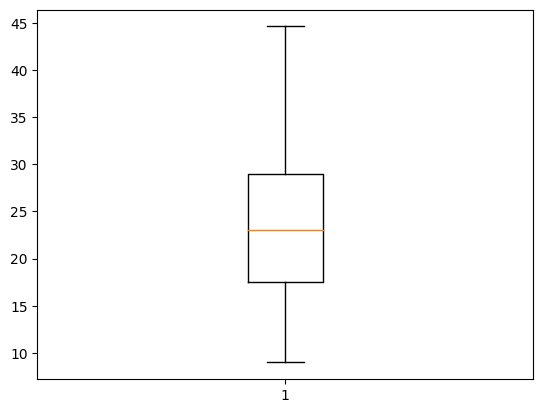

In [27]:
df = df[(df['mpg'] >= lower) & (df['mpg'] <= upper)]
plt.boxplot(df['mpg'])

<Axes: xlabel='mpg'>

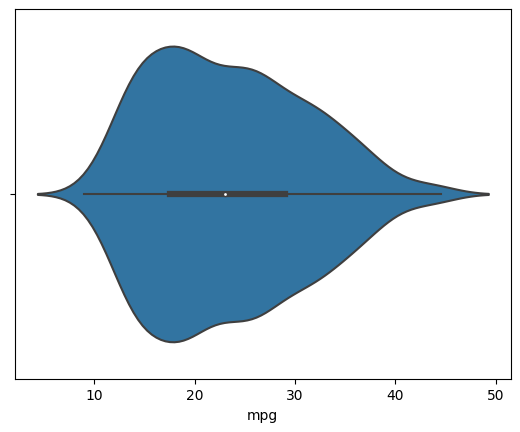

In [28]:
# Draw volin plot
sns.violinplot(data = df, x='mpg')

In [39]:
# Display heat map
cor = df.corr()
sns.heatmap(cor,annot = True, cmap = "coolwarm")

ValueError: could not convert string to float: 'usa'

In [35]:
# Standardise the contionous variable
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
con = df.select_dtypes(include=["int64", "float64"]).columns
standard = scaler.fit_transform(df[con])
print(standard)

[[-0.70592986  1.49553547  1.08809685 ...  0.62833707 -1.29290763
  -1.6250533 ]
 [-1.09405768  1.49553547  1.50104221 ...  0.85181073 -1.47438278
  -1.6250533 ]
 [-0.70592986  1.49553547  1.19373404 ...  0.54793385 -1.65585794
  -1.6250533 ]
 ...
 [ 1.10533326 -0.85819132 -0.56368456 ... -0.80118494 -1.43808775
   1.6250533 ]
 [ 0.58782951 -0.85819132 -0.70773526 ... -0.41099283  1.10256442
   1.6250533 ]
 [ 0.97595732 -0.85819132 -0.71733864 ... -0.29866479  1.39292467
   1.6250533 ]]


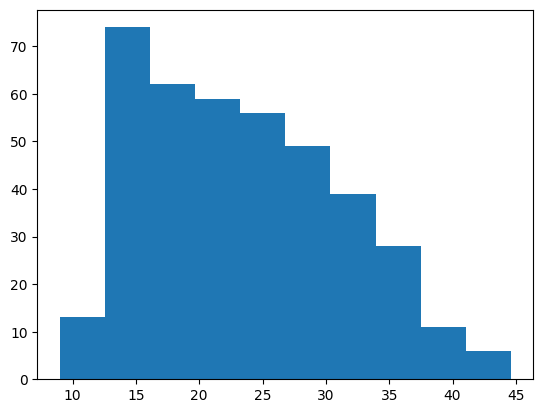

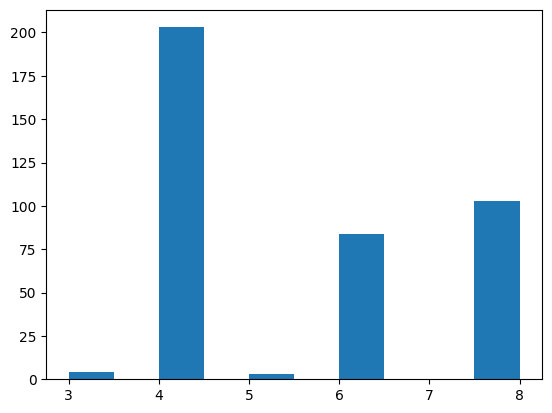

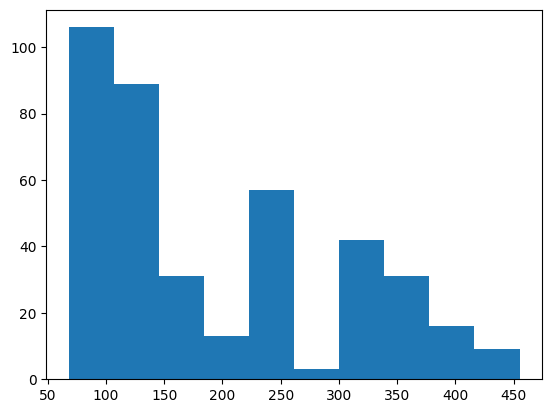

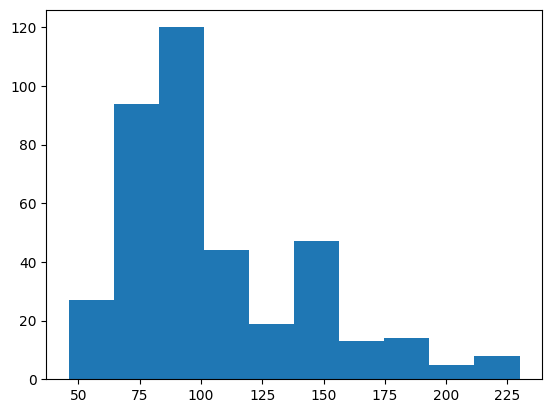

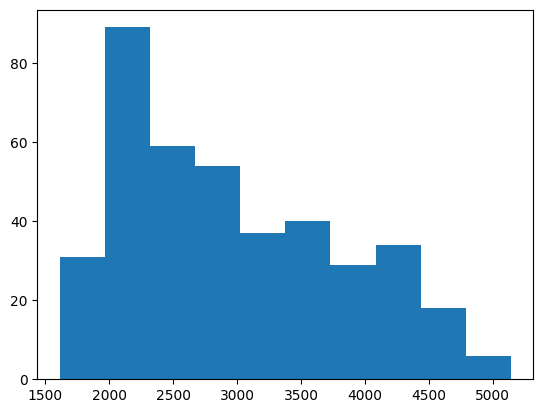

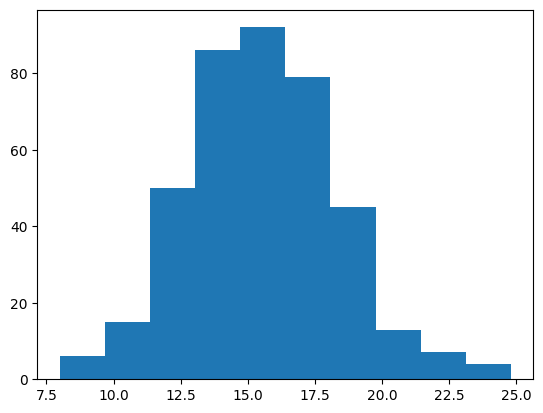

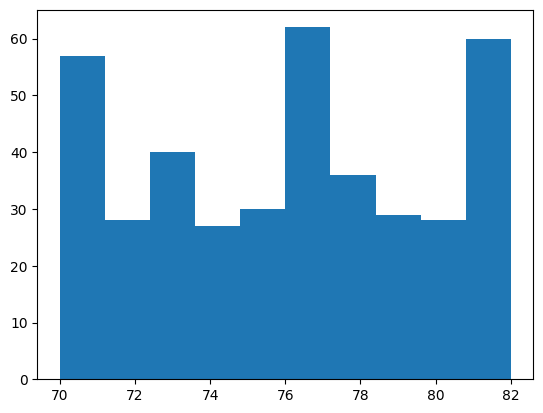

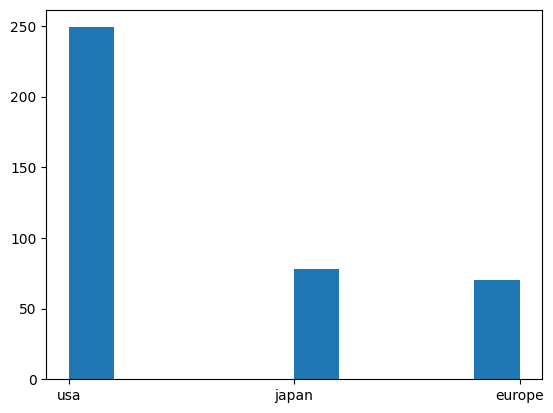

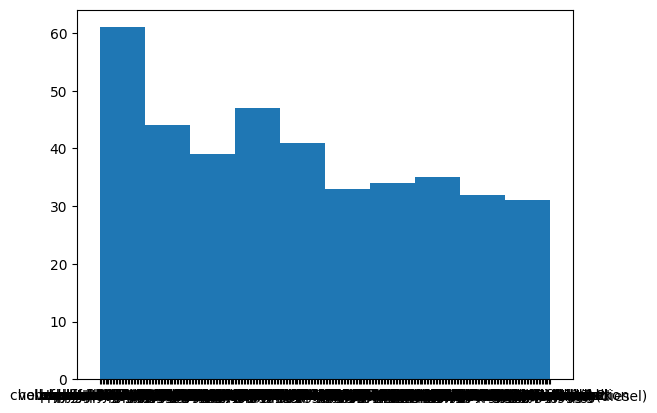

In [36]:
scales = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'name']
for i in scales:
    plt.hist(df[i])
    plt.show()

In [38]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [37]:
df.dropna()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [38]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64